In [1]:
## Exemplo de identificação


In [2]:
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt

from scipy.io import wavfile


In [3]:
# Carrega o siatema desconhecido
unknown_coefs = list()
with open('unknown_coefs.dat', 'r') as file: # Orig coefficients/unknown_coefs.dat
    for line in file.readlines():
        unknown_coefs.append(float(line.split(",")[0]))

In [4]:
# Define os tamanhos do sistema desconhecido e filtro adaptativo
UNKNOWN_SIZE = 160

ADAPT_SIZE =  200 # orig 200
adapt_coefs = np.zeros(shape=ADAPT_SIZE, dtype=float)
Fs = 8000


In [5]:
# Carrega o sinal de entrada
file = "ruido_branco.pcm"
input_data = np.memmap(file, dtype='h', mode='r')  # numpy function


In [6]:
# define os vetores
unk_samples = np.zeros(shape=UNKNOWN_SIZE, dtype=float)
adap_samples = np.zeros(shape=ADAPT_SIZE, dtype=float)


u = 1 * 10**-3 # Passo de adaptação

errors = list()


e = 0

filtered = list()
out = list()

In [7]:
# Testes WAG

#data_in = 100
#unk_samples = np.insert(unk_samples, 0, data_in)
#unk_samples = np.delete(unk_samples, -1)

#data_in = 200
#unk_samples = np.insert(unk_samples, 0, data_in)
#unk_samples = np.delete(unk_samples, -1)

#print(len(unk_samples))
#pylab.plot(unk_samples)
#pylab.show()

In [8]:
# Calculo do filtro adaptativo
for i, data_in in enumerate(input_data):
    data_in = data_in / 32768.0 # Lê uma amostra do Arquivo de entrada

    unk_samples = np.insert(unk_samples, 0, data_in) # Escreve a amostra na posição zero do vetor de amostra do sistema desconhecido
    unk_samples = np.delete(unk_samples, -1)

    adap_samples = np.insert(adap_samples, 0, data_in) # Escreve a amostra na posição zero do vetor de amostra do filtro adaptativo
    adap_samples = np.delete(adap_samples, -1)

    d = np.sum(unk_samples * unknown_coefs) # Calcula o D
    filtered.append(d) # Salva o D

    y = np.sum(adap_samples * adapt_coefs) # Calcula o Y
    out.append(y) # Salva o y

    e = d - y # Calcula o erro
    errors.append(e) # salva o erro

    #adapt_coefs += u*e*adap_samples # Atualiza os coeficientes do filtro adaptativo
    # Atualiza os coeficientes do filtro adaptativo
    for j in range(len(adapt_coefs)):
        adapt_coefs[j] += u * e * adap_samples[j]

print(e)


1.4569774813677494e-05


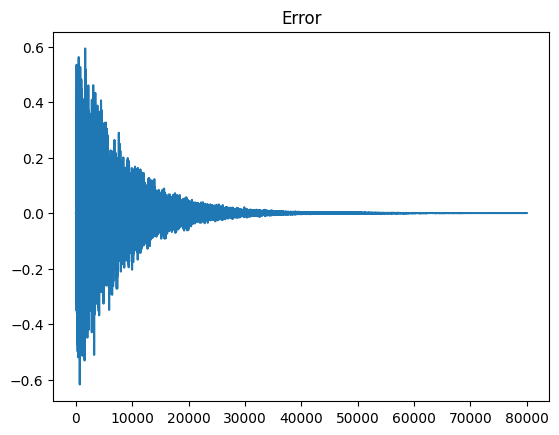

In [9]:
#file = open("coefficients/adapted_coefs.dat","w")
#for coef in adapt_coefs:
#    file.write(format(coef, 'f')+"\n")
#file.close()



pylab.title("Error")
#pylab.plot(input_data/32768, 'r') # Plota o sinal da entrada
pylab.plot(errors) # Plota o sinal do erro
pylab.show()



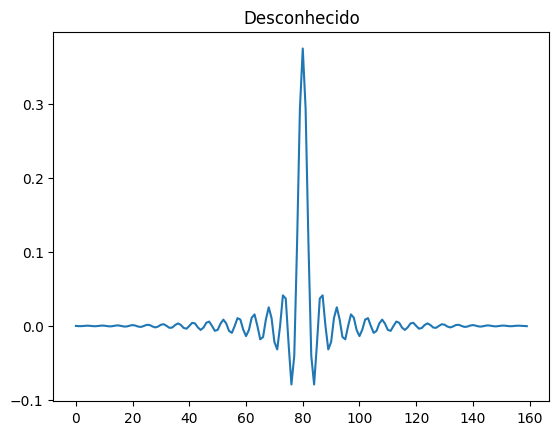

In [10]:
pylab.title("Desconhecido")
pylab.plot(unknown_coefs)
pylab.show()

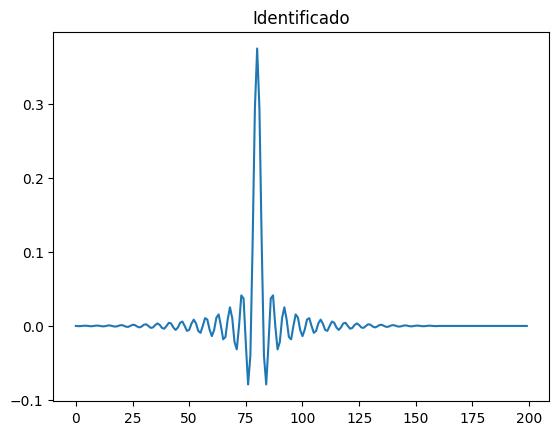

In [11]:
pylab.title("Identificado")
pylab.plot(adapt_coefs)
pylab.show()